# AirBnB hosting: all it's cracked up to be?
## Analytics report and research proposal

By Cindy Barrientos

### Introduction
(((Describe the problem)))
...
....
.....

 http://insideairbnb.com/get-the-data.html
     https://www.apartmentlist.com/rentonomics/rental-price-data/

theme: report for someone wanting to build a side income renting out airbnb in Portland, OR

1. how much can one expect to make on airbnb?
    - how much can one make on airbnb vs traditional renting?
2. how can one maximize their profits on airbnb?
    - location: zip code seems to generally be a poor indicator, though, a further look will show a few to avoid for higher market prices
    - links between: neighborhood and price (are room types confounding?), number of reviews//reviews per month an price, room type and price, availability over the course of a year and price
3. is competition good or bad? do you want to add your listing to a more or less populated zipcode?
    - t test in price between the two zip codes
4. how much does it cost to pay off an apartment/house, how long would it take to pay off property with airbnb rentals?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
pd.options.display.max_columns=30

In [3]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams({'font.size': 22})

## AirBnB data
The following data was obtained from: http://insideairbnb.com/about.html
Inside AirBnB is an independent, non-commercial entity offering open source access to data that has been scraped from listings on the AirBnB website. Their offerings include detailed listing, calendar availability, reviews, and GeoJSON data. For the purposes here, only the detailed listings are used.

In [4]:
full_OR_airbnb = pd.read_csv('listings.csv.gz', compression='gzip')

In [24]:
full_OR_airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
full_OR_airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7893,https://www.airbnb.com/rooms/7893,20181107122123,2018-11-07,North Williams 2brm Home,"Located on Williams bike corridor, some of Por...",This NE Portland 2 bedroom home is located jus...,"Located on Williams bike corridor, some of Por...",none,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,flexible,f,f,1,0.02
1,12899,https://www.airbnb.com/rooms/12899,20181107122123,2018-11-07,"Alberta Arts 2 bedroom suite, charming 1906 house",Settle in to a space of your own. You'll have ...,We live in a neighborhood of beautiful gardens...,Settle in to a space of your own. You'll have ...,none,We're within walking distance of a grocery and...,We welcome musicians and even have a guitar fo...,Parking is readily available in front of our h...,"Guests have the whole upstairs, two bedrooms, ...",We let our guests determine their level of int...,Please no smoking. The space is not child-proo...,...,10.0,10.0,10.0,10.0,10.0,t,14-218887-000-00-HO,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,moderate,f,f,1,4.67
2,16688,https://www.airbnb.com/rooms/16688,20181107122123,2018-11-07,"Beautiful condo in downtown Pearl, NW Portland","Newly remodeled 2 bedroom (3 queen beds), 2 fu...","- Fully furnished condo with high ceilings, bi...","Newly remodeled 2 bedroom (3 queen beds), 2 fu...",none,Easily one of Portland’s most desirable neighb...,- Smoking is strictly prohibited - Must be abl...,"Walking distance to the public Light Rail, bus...",Our guests enjoy entire home to themselves. Di...,"Our guests can reach us via phone, text or email.",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2008-190040-000-00-RS,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",t,f,moderate,f,f,1,2.37
3,25200,https://www.airbnb.com/rooms/25200,20181107122123,2018-11-07,Flamenco Dream :: hip mississippi ave.,"If you are an Urban Farming pioneer, enthusias...",The large farmhouse is surrounded by magical u...,"If you are an Urban Farming pioneer, enthusias...",none,Tierra Soul is located in the fun and hip Miss...,QUIET HOURS: (9pm -7am) We have guests from al...,"We are a 5 minute drive, and 10 minute MAX rid...",NaN,NaN,quiet-ish hours: 9pm - 7am this means we a...,...,9.0,10.0,10.0,10.0,9.0,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,6,0.33
4,26203,https://www.airbnb.com/rooms/26203,20181107122123,2018-11-07,Bluebird @ hip mississippi ave,"If you are an Urban Farming pioneer, enthusias...",The large farmhouse is surrounded by magical u...,"If you are an Urban Farming pioneer, enthusias...",none,We are located in the fun and hip Mississippi ...,QUIET HOURS: (9pm -7am) We have guests from al...,"We are a 5 minute drive, and 10 minute MAX rid...",NaN,NaN,quiet-ish hours: 9pm - 7am this means we a...,...,10.0,9.0,10.0,10.0,9.0,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,6,0.27


### Cleaning the data

There is a lot more data here than is necessary or that I can even work with. Will do  bit of cleaning and refining to prepare for analytics
1. remove excess columns
2. fix price column such that the '%' and ',' symbols are dropped, then turn into a floating point
3. remove listings that are valued at greater than USD500/night

*so many columns, maybe i should make new sub-dataframes with themes such as reviews?

#### Removing excess column data

In [25]:
airbnb = full_OR_airbnb.drop(columns=['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'host_total_listings_count', 'neighbourhood_group_cleansed', 
                                              'requires_license', 'license', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
                                              'calendar_last_scraped', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'street', 
                                              'host_verifications', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'listing_url', 'scrape_id',
                                              'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
                                              'house_rules', 'picture_url', 'host_id', 'host_url', 'square_feet', 'weekly_price', 'monthly_price', 'neighbourhood', 'require_guest_profile_picture',
                                              'require_guest_phone_verification', 'calculated_host_listings_count'])
                                                # dropped because only 61 of 5000 listings have this info
                                                # only using price/night, not considering weekly/monthly discounts
airbnb.describe()

,id,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,5.317000e+03,5312.000000,5317.000000,5314.000000,5315.000000,5316.000000,5317.000000,5317.000000,5317.000000,5317.000000,4846.000000,4844.000000,4843.000000,4841.000000,4842.000000,4841.000000,4841.000000,5317.000000,4877.000000
mean,1.531575e+07,12.256589,3.435960,1.230335,1.359172,1.869451,1.811360,4.221930,489.343051,60.934173,96.931077,9.880058,9.784844,9.940921,9.932879,9.790126,9.739103,2.123190,3.013443
std,8.481055e+06,114.287981,1.898449,0.510583,0.901567,1.230026,1.292145,10.049577,534.905799,81.961679,4.410958,0.426587,0.548327,0.302573,0.341687,0.477763,0.551386,4.193996,2.920180
min,7.893000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,5.000000,2.000000,4.000000,2.000000,1.000000,0.010000
25%,7.959145e+06,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,6.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.780000
50%,1.625721e+07,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,90.000000,29.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,2.380000
75%,2.188217e+07,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1125.000000,84.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,4.450000
max,2.986167e+07,1305.000000,24.000000,5.000000,8.000000,16.000000,15.000000,222.000000,5000.000000,865.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,41.000000,58.160000


In [26]:
airbnb.head()

,id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,property_type,room_type,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7893,Jesse,2009-06-14,NaN,NaN,f,1.0,t,f,Piedmont,Portland,OR,97217,House,Entire home/apt,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,flexible,f,f,1,0.02
1,12899,Ali And David,2009-10-29,NaN,NaN,t,1.0,t,t,Concordia,Portland,OR,97211,Guest suite,Private room,...,98.0,10.0,10.0,10.0,10.0,10.0,10.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,moderate,f,f,1,4.67
2,16688,Ashish,2009-12-21,within an hour,100%,t,1.0,t,f,Pearl,Portland,OR,97209,House,Entire home/apt,...,97.0,10.0,10.0,10.0,10.0,10.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",t,f,moderate,f,f,1,2.37
3,25200,Garden,2010-04-05,within a few hours,100%,f,7.0,t,t,Humboldt,Portland,OR,97217,House,Private room,...,93.0,9.0,9.0,10.0,10.0,10.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,6,0.33
4,26203,Garden,2010-04-05,within a few hours,100%,f,7.0,t,t,Humboldt,Portland,OR,97217,House,Private room,...,92.0,9.0,10.0,9.0,10.0,10.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,6,0.27


There is still 43 columns of data

#### Refining price data
First, to make the price data useable, I have to remove the symbols ('$' and ',') as well as turn the strings into floats. Then, I'll check the integrity of the price data.

In [8]:
# remove symbols to convert price from string to float
airbnb.price = [x.strip('$') for x in airbnb.price]
airbnb.price = airbnb.price.str.replace(',', '')

In [9]:
airbnb.dtypes
airbnb['price'] = airbnb['price'].astype('float')

In [10]:
airbnb.price.max()

8400.0

<b>Note:</b> I don't believe there is really an AirBnB listing available for $8400. As it turns out in searching the listing URL, the cost is 84/night:

In [11]:
full_OR_airbnb.loc[airbnb['price']==8400]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
836,4684661,https://www.airbnb.com/rooms/4684661,20181107122123,2018-11-07,Charming quiet bohemian getaway!,NaN,You have your own private entrance into the fl...,You have your own private entrance into the fl...,none,"A great place to walk around, fruit trees and ...",NaN,Public transportattion is nearby and I have un...,You have the entire upstairs which consists of...,Since I live in the house you have ready acces...,No Smoking - I have had new carpets put in as ...,...,10.0,10.0,10.0,10.0,10.0,t,15-131548-000-00-HO,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",t,f,moderate,f,f,1,3.42


In [12]:
airbnb.at[836, 'price'] = 84.00
airbnb.price.max()

2835.0

<b>Note:</b> The next highest listing is no longer available so I cannot verify. There are a handful of listings today 12/18/2018 that are above USD1500, but they are meant as retreats or special events. I'm not interested in seeing investment opportunities in such large and expensive properties, so I'll limit my data up to $500 per night.

In [13]:
airbnb = airbnb[airbnb['price']<=500]
airbnb.price.describe()

count    5285.000000
mean      110.112772
std        71.466615
min         0.000000
25%        65.000000
50%        90.000000
75%       129.000000
max       500.000000
Name: price, dtype: float64

#### Refining location data
I need to define how I will separate the location data. I can use either neighborhoods, jurisdictions, or zipcode. In the following I'll look at the data to determine the best approach here.

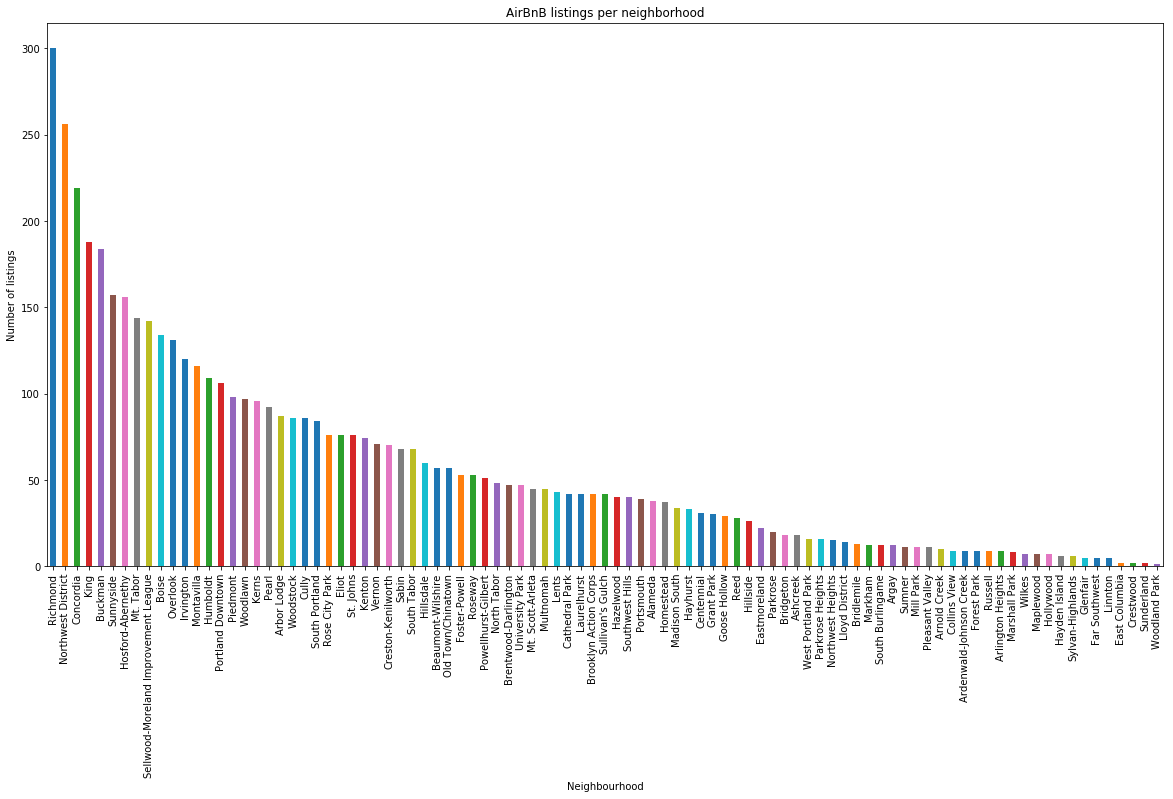

In [14]:
airbnb.neighbourhood_cleansed.value_counts().plot(kind="bar")
plt.xlabel('Neighbourhood')
plt.ylabel('Number of listings')
plt.title('AirBnB listings per neighborhood')
plt.show()

<b>Note:</b> Lots of different neighborhood classifications. Might want to combine some of these for it to be of use, or use jurisdiction

In [15]:
airbnb.jurisdiction_names.value_counts()

{OREGON," MULTNOMAH"," PORTLAND"}                  5172
{OREGON}                                             93
{OREGON," MULTNOMAH"}                                 9
{OREGON," Washington County"," OR"}                   7
{OREGON," PORTLAND"}                                  3
{OREGON," Washington County"," OR"," PORTLAND"}       1
Name: jurisdiction_names, dtype: int64

<b>Note:</b> Okay jurisdiction won't be useful either - almost everything is in Multnomah county. Let's get rid of that column data

In [16]:
airbnb = full_OR_airbnb.drop(columns='jurisdiction_names')

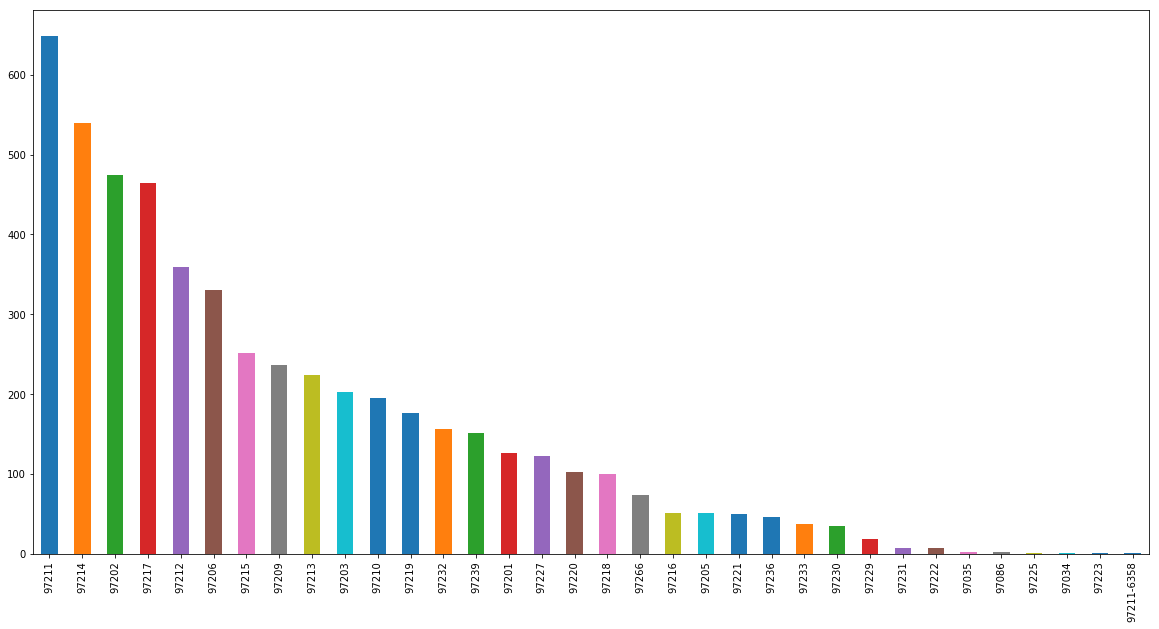

In [17]:
airbnb.zipcode.value_counts().plot(kind='bar')
plt.show()

<b>Note:</b> These have a more digestible amount of categories. I could even remove the last 10 or so because there isn't enough airbnb listings there, suggestings these are not tourist-heavy areas. The data would also be limited to analyze; there are only about 100 listings in the last 10 zipcodes, so I'd hesitate to trust any conclusions. If going by zip code, it might be difficult to compare to apartmentlist and zillow that combines by city name.

In [ ]:
airbnb = airbnb()

In [19]:
# how do i filter for a series of values?
# it's also suddenly not working
full_OR_airbnb.loc[(airbnb['zipcode']=='97034') | (airbnb['zipcode']=='97211-6358') | (airbnb['zipcode']=='97225') |
           (airbnb['zipcode']=='97035') | (airbnb['zipcode']=='97068') | (airbnb['zipcode']=='97222') |
           (airbnb['zipcode']=='97231') | (airbnb['zipcode']=='97229') | (airbnb['zipcode']=='97230') |
           (airbnb['zipcode']=='97233')]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
49,203462,https://www.airbnb.com/rooms/203462,20181107122123,2018-11-07,"Luxury 4BR/3BA above Dwntn, up to 9","Complete 4 bedroom, 3 full bath, kitchen, livi...",Keep your group together and stay at an amazin...,"Complete 4 bedroom, 3 full bath, kitchen, livi...",none,"Serenity, amazing views, fresh air, large exec...",Be frugal with towels and utilities. A full l...,"If you wish to avoid downtown parking rates, P...",We have posted 50+ photos of what you/your gro...,The interaction with guests is up to you. We ...,"Treat the premises as your home, with frugalit...",...,10.0,10.0,10.0,9.0,9.0,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,1,0.60
286,1280971,https://www.airbnb.com/rooms/1280971,20181107122123,2018-11-07,Cozy Room In Home away Home,Welcome to your cozy room in Home away Home!,Your Private Bedroom has a queen bed in 4 bedr...,Welcome to your cozy room in Home away Home! Y...,none,The house is located in a beautiful neighborho...,Street Parking is available except no parking ...,The place is 15 min driving distance to downto...,Guest can access to kitchen and bathroom and c...,"I would be living in the house as well, but I ...",Thanks for taking off your shoes in the entran...,...,10.0,10.0,9.0,9.0,9.0,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,moderate,t,t,1,0.22
305,1373521,https://www.airbnb.com/rooms/1373521,20181107122123,2018-11-07,Private guesthouse in NE Portland,Private guesthouse room in NE Portland. 10 mi...,Children - no children under the age of 8 are ...,Private guesthouse room in NE Portland. 10 mi...,none,Located in the outer NE of Portland. Close to...,"There are no cooking facilities. Sorry, no pet...",Uber or Lyft are great ways to get around Port...,Wireless Internet Cable TV Mini Fridge Keurig ...,I'm here to provide any assistance you need. ...,No smoking in the guesthouse. Smoking is perm...,...,10.0,10.0,10.0,9.0,10.0,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,1,5.66
447,2346466,https://www.airbnb.com/rooms/2346466,20181107122123,2018-11-07,Peaceful Condo for Couple or Individual,The solitude of a retreat and the convenience ...,Close to the airport and 20 minutes from downt...,The solitude of a retreat and the convenience ...,none,Close to skiing and on the way to the Columbia...,"Close to Fred Meyer shopping center, food and ...",TriMet,"Two parking spots, wi-fi, utilities, swimming ...",I can interact as much or as little as a parti...,I live in a quiet building with many older nei...,...,10.0,10.0,10.0,9.0,9.0,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,3,0.36
460,2407080,https://www.airbnb.com/rooms/2407080,20181107122123,2018-11-07,"GORGEOUS Modern Newer Home, watch the ecliplse!",Gorgeous home in the beautiful west hills.. Le...,Our house is absolutely immaculate and perfect...,Gorgeous home in the beautiful west hills.. Le...,none,Newer subdivision of very upscale homes. Mount...,NaN,Mass transit is about 1 mile away.,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,t,NaN,"{OREGON,"" Washington County"","" OR""}",f,f,strict_14_with_grace_period,f,f,1,0.02
542,3040690,https://www.airbnb.com/rooms/3040690,20181107122123,2018-11-07,Wildwood House - Guest Room,Our cozy and stylish home is a serene sanctuar...,"Lovely art-filled, cozy and stylish home nestl...",Our cozy and stylish home is a serene sanctuar...,none,"Our home is on a large, wooded property - you ...","More nature info... for

In [18]:
airbnb = airbnb[airbnb['zipcode']!='97034' | airbnb['zipcode']!='97211-6358' | (airbnb['zipcode']!='97225') |
           (airbnb['zipcode']!='97035') | (airbnb['zipcode']!='97068') | (airbnb['zipcode']!='97222') |
           (airbnb['zipcode']!='97231') | (airbnb['zipcode']!='97229') | (airbnb['zipcode']!='97230') |
           (airbnb['zipcode']!='97233')]

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

QUESTION: how do I drop the less useful zipcodes from the data

### Exploring the data: continuous variables
- what parameters influence price?

In [27]:
# continuous
airbnb_cont = airbnb[['id', 'price', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
                              'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                              'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                              'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']].copy()
airbnb_cont.head()

,id,price,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,7893,175.0,1.0,3,1.0,2.0,2.0,1,3,30,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0.02
1,12899,65.0,1.0,3,1.0,2.0,2.0,2,2,730,500,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,4.67
2,16688,275.0,1.0,8,2.0,2.0,3.0,6,2,365,44,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.37
3,25200,49.0,7.0,2,1.0,1.0,1.0,1,7,1125,34,93.0,9.0,9.0,10.0,10.0,10.0,9.0,6,0.33
4,26203,49.0,7.0,2,1.0,1.0,1.0,1,3,1125,28,92.0,9.0,10.0,9.0,10.0,10.0,9.0,6,0.27


In [23]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7893,https://www.airbnb.com/rooms/7893,20181107122123,2018-11-07,North Williams 2brm Home,"Located on Williams bike corridor, some of Por...",This NE Portland 2 bedroom home is located jus...,"Located on Williams bike corridor, some of Por...",none,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,flexible,f,f,1,0.02
1,12899,https://www.airbnb.com/rooms/12899,20181107122123,2018-11-07,"Alberta Arts 2 bedroom suite, charming 1906 house",Settle in to a space of your own. You'll have ...,We live in a neighborhood of beautiful gardens...,Settle in to a space of your own. You'll have ...,none,We're within walking distance of a grocery and...,We welcome musicians and even have a guitar fo...,Parking is readily available in front of our h...,"Guests have the whole upstairs, two bedrooms, ...",We let our guests determine their level of int...,Please no smoking. The space is not child-proo...,...,10.0,10.0,10.0,10.0,10.0,10.0,t,14-218887-000-00-HO,f,f,moderate,f,f,1,4.67
2,16688,https://www.airbnb.com/rooms/16688,20181107122123,2018-11-07,"Beautiful condo in downtown Pearl, NW Portland","Newly remodeled 2 bedroom (3 queen beds), 2 fu...","- Fully furnished condo with high ceilings, bi...","Newly remodeled 2 bedroom (3 queen beds), 2 fu...",none,Easily one of Portland’s most desirable neighb...,- Smoking is strictly prohibited - Must be abl...,"Walking distance to the public Light Rail, bus...",Our guests enjoy entire home to themselves. Di...,"Our guests can reach us via phone, text or email.",NaN,...,10.0,10.0,10.0,10.0,10.0,9.0,t,2008-190040-000-00-RS,t,f,moderate,f,f,1,2.37
3,25200,https://www.airbnb.com/rooms/25200,20181107122123,2018-11-07,Flamenco Dream :: hip mississippi ave.,"If you are an Urban Farming pioneer, enthusias...",The large farmhouse is surrounded by magical u...,"If you are an Urban Farming pioneer, enthusias...",none,Tierra Soul is located in the fun and hip Miss...,QUIET HOURS: (9pm -7am) We have guests from al...,"We are a 5 minute drive, and 10 minute MAX rid...",NaN,NaN,quiet-ish hours: 9pm - 7am this means we a...,...,9.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,6,0.33
4,26203,https://www.airbnb.com/rooms/26203,20181107122123,2018-11-07,Bluebird @ hip mississippi ave,"If you are an Urban Farming pioneer, enthusias...",The large farmhouse is surrounded by magical u...,"If you are an Urban Farming pioneer, enthusias...",none,We are located in the fun and hip Mississippi ...,QUIET HOURS: (9pm -7am) We have guests from al...,"We are a 5 minute drive, and 10 minute MAX rid...",NaN,NaN,quiet-ish hours: 9pm - 7am this means we a...,...,9.0,10.0,9.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,6,0.27


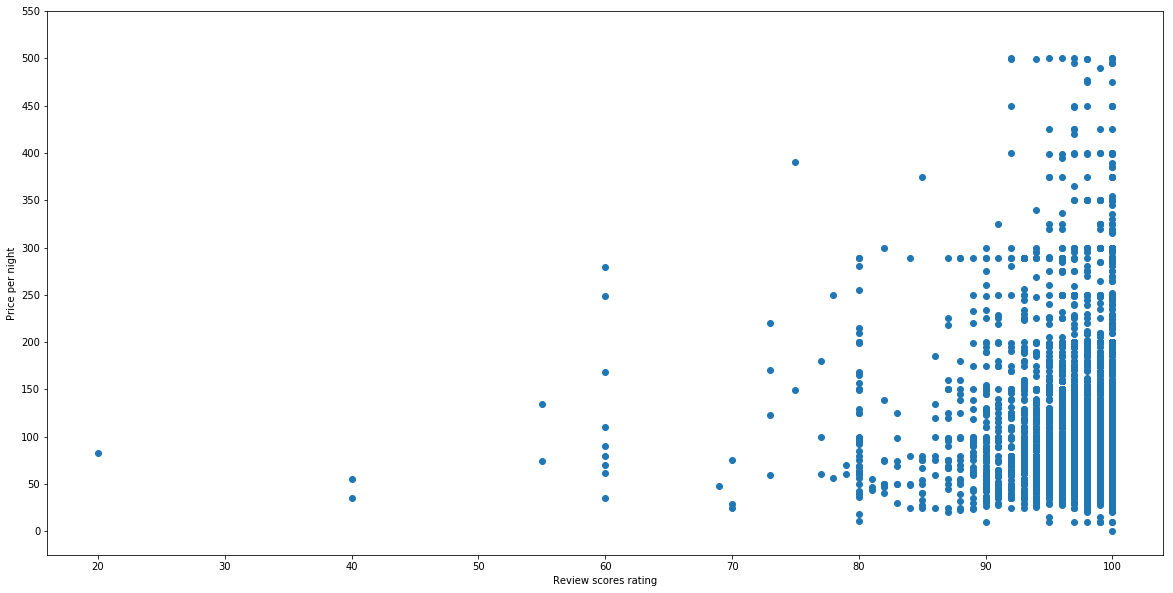

In [26]:
plt.scatter(x='review_scores_rating', y='price', data=airbnb)
plt.xlabel("Review scores rating")
plt.ylabel("Price per night")
plt.yticks(np.arange(0, 600, step=50))
plt.show()

<b>Comment</b> It looks like what you pay for is not necessarily what you get. Though the highest rated listing has the highest reviews, 100% positive score is found throughout the entire price spectrum.

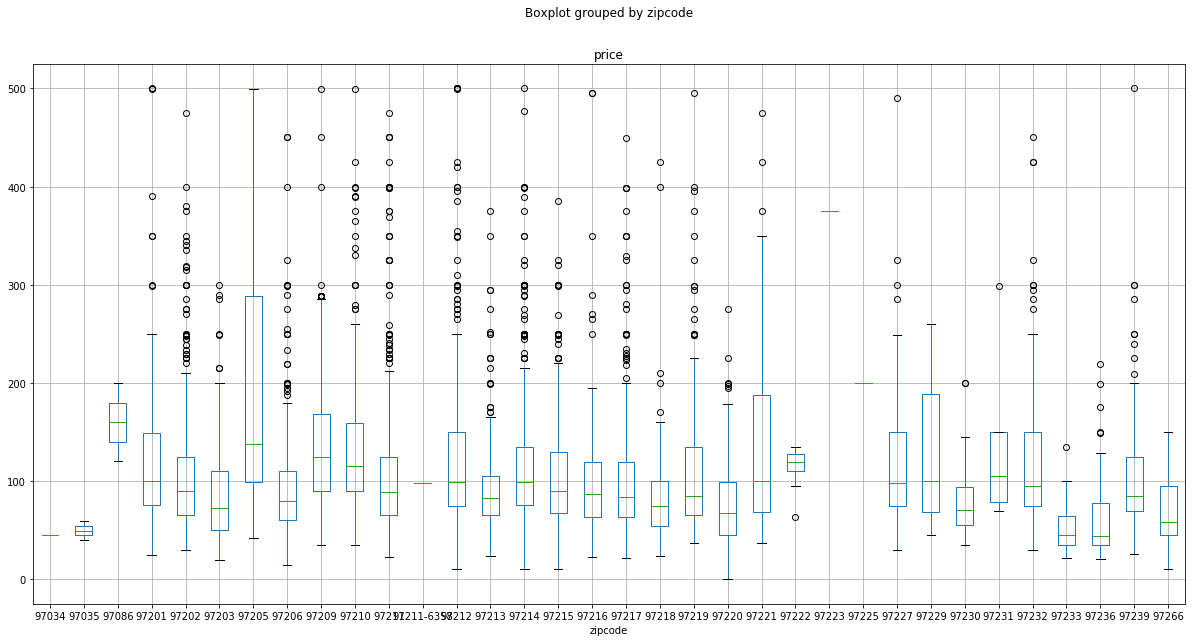

In [29]:
airbnb.boxplot(column='price', by='zipcode')

<b>Note:</b> There is a large variability in price per night lodging by zipcode. Thereforoe, zipcode should not be a huge factor in setting up an AirBnB. However, there are a few one may want to avoid if hoping to charge big bucks.

In [ ]:
# Scan here for zipcodes that do not have the price ranges above USD 200

In [17]:
# discrete
airbnb_cat = full_OR_airbnb.drop(columns=[airbnb_cont.columns])
airbnb_cat.head()

KeyError: "labels [('id', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month')] not contained in axis"

In [7]:
full_OR_airbnb.host_response_time.unique()

array([nan, 'within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [17]:
airbnb.bed_type.value_counts()

Real Bed         5214
Futon              57
Pull-out Sofa      27
Airbed             10
Couch               9
Name: bed_type, dtype: int64

In [52]:
airbnb.loc[airbnb['bed_type']=='Couch']

,id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,state,zipcode,property_type,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
72,293584,Summer + Patrick,2011-12-16,a few days or more,33%,f,1.0,t,t,NaN,Buckman,Portland,OR,97214,Loft,...,2012-10-24,100.0,10.0,9.0,9.0,10.0,10.0,9.0,f,f,moderate,f,f,1,0.14
74,296946,Margot,2013-05-09,within an hour,98%,f,7.0,t,t,Kerns,Kerns,Portland,OR,97232,Other,...,2014-01-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,f,f,7,0.02
117,573191,Deanna,2009-08-18,within a day,75%,f,1.0,t,f,NaN,Irvington,Portland,OR,97212,Apartment,...,2017-07-23,87.0,9.0,8.0,9.0,10.0,9.0,9.0,f,f,flexible,f,f,1,2.00
689,3969896,Michael,2014-08-26,NaN,NaN,f,1.0,t,f,Old Town/Chinatown,Old Town/Chinatown,Portland,OR,97209,Apartment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
1156,6892357,Eugene,2015-03-18,within an hour,100%,t,2.0,t,f,Buckman,Buckman,Portland,OR,97214,House,...,2018-10-14,92.0,9.0,10.0,9.0,9.0,10.0,9.0,f,f,flexible,f,f,2,0.27
1372,8167765,Anesa,2010-08-30,within an hour,100%,t,1.0,t,t,Rose City Park,Rose City Park,Portland,OR,97215,Apartment,...,2018-11-06,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,f,f,1,3.30
2116,13415468,Benjamin,2015-09-14,within an hour,100%,f,4.0,t,t,Richmond,Richmond,Portland,OR,97214,Cottage,...,2018-07-23,94.0,10.0,9.0,10.0,10.0,10.0,10.0,t,f,moderate,f,f,3,0.64
3089,18720162,Stuart,2015-10-07,NaN,NaN,f,9.0,t,t,Powellhurst-Gilbert,Powellhurst-Gilbert,Portland,OR,97236,House,...,2018-10-07,92.0,9.0,9.0,10.0,10.0,9.0,9.0,t,f,moderate,f,f,9,5.28
3617,20554660,Stewart,2017-08-10,NaN,NaN,f,1.0,t,f,Sunnyside,Sunnyside,Portland,OR,97214,House,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN


## To Do
- start looking for links between variables and price of stay/night. unfortunately, most data does not have sq footage so will have to take entire price and compare, despite different size apts/homes.
- analyze data above
- find out where all the NaNs are in the columns to give a total count of 14 post-dropna. see if we can change the values to zero
- once there seems to be some interesting parallels.. try doing a t test between the best and worst variables (ex. neighbors), or should I wait and see if normal distribution? Maybe i'll have to do mann-whitney instead.

### Apartmentlist.com data
- I think this data is not so good. The Portland, OR locations are mislabeled in their states. But, the prices extend into 2018, so it's up to date
- this is also averages, but it's per # of bedrooms in a home, rather than sqft as Zillow

-  could consider looking at monthly rental prices in the area as well, to see if airbnb is more profitable than renting, data here: https://www.apartmentlist.com/rentonomics/rental-price-data/


rent = pd.read_csv('Apartment-Rent-Data-City_2018-10.csv')

portland_rent = rent[rent['Location'] == 'Portland, OR']
portland_rent.describe()

portland_rent

### Zillow rent data
- Data probably much more reliable, uses their Rent Zestimates algorithms to track the rental data, includes locations that aren't currently listed. Only extends to 2017 data
- only shows overall average per neighborhood
- price per sq ftage.. how will i compare to the airbnb data?

In [25]:
zillow = pd.read_csv('zillow-pricepersqft.csv')

In [27]:
zillow_OR = zillow[(zillow['Metro']=='Portland') & (zillow['State']=='OR')]
zillow_OR.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,...,November 2015,December 2015,January 2016,February 2016,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
29,13373,Portland,Portland,Multnomah,OR,30,1.020,1.018,1.018,1.022,1.028,1.032,1.036,1.038,1.042,...,1.434,1.444,1.456,1.464,1.476,1.486,1.498,1.506,1.510,1.512,1.516,1.520,1.524,1.524,1.520
322,30381,Beaverton,Portland,Washington,OR,323,0.838,0.846,0.848,0.844,0.844,0.844,0.846,0.852,0.856,...,1.092,1.098,1.106,1.112,1.124,1.134,1.146,1.156,1.162,1.168,1.174,1.178,1.182,1.182,1.178
380,11914,Hillsboro,Portland,Washington,OR,381,0.798,0.810,0.814,0.814,0.812,0.812,0.812,0.816,0.816,...,1.024,1.028,1.036,1.044,1.054,1.066,1.076,1.086,1.090,1.092,1.096,1.100,1.102,1.102,1.100
578,24967,Gresham,Portland,Multnomah,OR,579,0.848,0.838,0.830,0.824,0.822,0.818,0.816,0.814,0.818,...,1.080,1.082,1.088,1.098,1.110,1.120,1.130,1.138,1.142,1.144,1.146,1.152,1.154,1.158,1.160
860,30177,Aloha,Portland,Washington,OR,861,0.850,0.860,0.860,0.854,0.846,0.842,0.842,0.846,0.848,...,1.076,1.082,1.090,1.098,1.112,1.124,1.136,1.144,1.148,1.152,1.160,1.168,1.176,1.176,1.172


In [ ]:
zillow_OR